In [16]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import numpy as np
from datetime import date
import matplotlib.ticker as ticker
from PyPDF2 import PdfFileMerger, PdfFileReader
import scipy.stats
plt.style.use('bmh')
pd.set_option('display.max_columns', None)
states = ["AL", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
us_state_abbrev = {'the United States':'US','Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO', 'Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC', 'Florida': 'FL','Georgia': 'GA','Guam': 'GU','Hawaii': 'HI', 'Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA', 'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO', 'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC', 'North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR', 'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT', 'Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [63]:
dir(os)

['CLD_CONTINUED',
 'CLD_DUMPED',
 'CLD_EXITED',
 'CLD_TRAPPED',
 'DirEntry',
 'EX_CANTCREAT',
 'EX_CONFIG',
 'EX_DATAERR',
 'EX_IOERR',
 'EX_NOHOST',
 'EX_NOINPUT',
 'EX_NOPERM',
 'EX_NOUSER',
 'EX_OK',
 'EX_OSERR',
 'EX_OSFILE',
 'EX_PROTOCOL',
 'EX_SOFTWARE',
 'EX_TEMPFAIL',
 'EX_UNAVAILABLE',
 'EX_USAGE',
 'F_LOCK',
 'F_OK',
 'F_TEST',
 'F_TLOCK',
 'F_ULOCK',
 'MutableMapping',
 'NGROUPS_MAX',
 'O_ACCMODE',
 'O_APPEND',
 'O_ASYNC',
 'O_CLOEXEC',
 'O_CREAT',
 'O_DIRECTORY',
 'O_DSYNC',
 'O_EXCL',
 'O_EXLOCK',
 'O_NDELAY',
 'O_NOCTTY',
 'O_NOFOLLOW',
 'O_NONBLOCK',
 'O_RDONLY',
 'O_RDWR',
 'O_SHLOCK',
 'O_SYNC',
 'O_TRUNC',
 'O_WRONLY',
 'PRIO_PGRP',
 'PRIO_PROCESS',
 'PRIO_USER',
 'P_ALL',
 'P_NOWAIT',
 'P_NOWAITO',
 'P_PGID',
 'P_PID',
 'P_WAIT',
 'PathLike',
 'RTLD_GLOBAL',
 'RTLD_LAZY',
 'RTLD_LOCAL',
 'RTLD_NODELETE',
 'RTLD_NOLOAD',
 'RTLD_NOW',
 'R_OK',
 'SCHED_FIFO',
 'SCHED_OTHER',
 'SCHED_RR',
 'SEEK_CUR',
 'SEEK_END',
 'SEEK_SET',
 'ST_NOSUID',
 'ST_RDONLY',
 'TMP_MAX',
 'W

In [66]:
import os
for sa in states:
    os.mkdir('../State Factbase/Visualizations/States/'+abbrev_us_state[sa]+'/Natural Gas Prices/')

In [32]:
def val_max(arr):
    maxes = [max(i) for i in arr]
    return max(maxes)

In [73]:
df = pd.read_csv('../State Factbase/Spreadsheets/State-Level Data/'+abbrev_us_state[sa]+ '/Energy Economics/'+sa+' Electricity and Natural Gas Prices.csv',index_col=0)
df.head(15)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
"Natural Gas Citygate Price in Wyoming, Annual (Dollars per Thousand Cubic Feet)",5.070000,6.390000,2.870000,2.520000,6.210000,8.040000,7.200000,5.900000,7.020000,4.890000,5.040000,4.650000,4.030000,4.510000,5.270000,4.360000,3.530000,3.920000,3.740000,3.48
"Wyoming Price of Natural Gas Delivered to Residential Consumers, Annual (Dollars per Thousand Cubic Feet)",6.110000,8.450000,6.080000,7.140000,8.650000,10.530000,11.600000,8.840000,10.160000,9.390000,8.580000,8.720000,8.420000,8.270000,9.340000,9.330000,8.510000,9.010000,8.600000,8.06
"Wyoming Price of Natural Gas Sold to Commercial Consumers, Annual (Dollars per Thousand Cubic Feet)",5.270000,8.270000,4.730000,5.840000,7.240000,9.190000,10.300000,7.890000,8.870000,8.010000,7.130000,7.290000,6.720000,6.810000,7.690000,7.430000,6.540000,6.920000,6.610000,6.30
"Electricity price in the residential sector, Wyoming (Dollars per million Btu)",19.040000,19.850000,20.430000,20.630000,21.140000,21.910000,22.700000,22.720000,24.080000,25.140000,25.710000,26.690000,28.860000,29.770000,30.760000,32.140000,32.630000,33.330000,33.080000,32.75
"Electricity price in the commercial sector, Wyoming (Dollars per million Btu)",15.410000,15.800000,16.760000,16.830000,17.530000,18.100000,18.400000,18.310000,19.660000,21.340000,21.730000,22.610000,24.150000,25.120000,26.030000,26.730000,27.550000,28.420000,28.060000,28.26
Natural Gas Citygate Price $/Tcf (Inflation Adjusted to 2019 USD),7.527415,9.227317,4.079259,3.501335,8.404118,10.526357,9.132367,7.274639,8.337518,5.826408,5.908450,5.285304,4.487563,4.949496,5.691618,4.703113,3.760151,4.088179,3.807784,3.48
Natural Gas Residential Price $/Tcf (Inflation Adjusted to 2019 USD),9.071501,12.202008,8.641776,9.920448,11.706219,13.786385,14.713258,10.899628,12.066835,11.188133,10.058433,9.911366,9.376000,9.075905,10.087232,10.064229,9.064840,9.396553,8.755867,8.06
Natural Gas Commercial Price $/Tcf (Inflation Adjusted to 2019 USD),7.824355,11.942083,6.722960,8.114204,9.798038,12.031992,13.064358,9.728288,10.534727,9.543870,8.358581,8.285993,7.482983,7.473629,8.305226,8.014708,6.966399,7.216887,6.729800,6.30
Electricity Residential Price $/MMBtu (Inflation Adjusted to 2019 USD),28.268637,28.663888,29.038071,28.663703,28.609188,28.685632,28.792323,28.013524,28.599349,29.954170,30.140128,30.336509,32.136740,32.671064,33.220904,34.669275,34.757432,34.759947,33.679546,32.75
Electricity Commercial Price $/MMBtu (Inflation Adjusted to 2019 USD),22.879186,22.815588,23.821737,23.383913,23.723702,23.697395,23.338271,22.576040,23.349801,25.426491,25.474329,25.699081,26.891971,27.567925,28.112488,28.833532,29.346223,29.639295,28.568562,28.26


In [76]:
for i in range(len(df.index)):
    print(i, df.index[i])

0 Natural Gas Citygate Price in Wyoming, Annual (Dollars per Thousand Cubic Feet)
1 Wyoming Price of Natural Gas Delivered to Residential Consumers, Annual (Dollars per Thousand Cubic Feet)
2 Wyoming Price of Natural Gas Sold to Commercial Consumers, Annual (Dollars per Thousand Cubic Feet)
3 Electricity price in the residential sector, Wyoming (Dollars per million Btu)
4 Electricity price in the commercial sector, Wyoming (Dollars per million Btu)
5 Natural Gas Citygate Price $/Tcf (Inflation Adjusted to 2019 USD)
6 Natural Gas Residential Price $/Tcf (Inflation Adjusted to 2019 USD)
7 Natural Gas Commercial Price $/Tcf (Inflation Adjusted to 2019 USD)
8 Electricity Residential Price $/MMBtu (Inflation Adjusted to 2019 USD)
9 Electricity Commercial Price $/MMBtu (Inflation Adjusted to 2019 USD)
10 Inflation Adjustment Factor (2019)


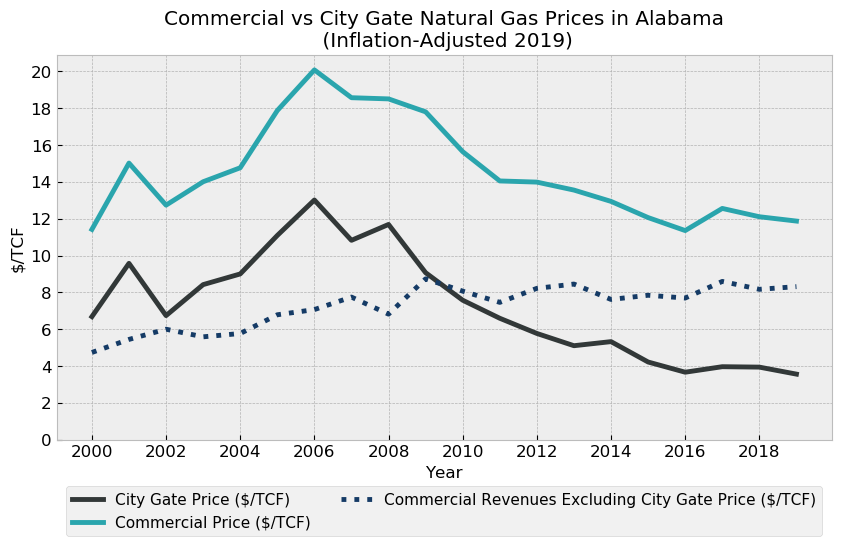

In [85]:
for sa in states[0:1]:
    df = pd.read_csv('../State Factbase/Spreadsheets/State-Level Data/'+abbrev_us_state[sa]+ '/Energy Economics/'+sa+' Electricity and Natural Gas Prices.csv',index_col=0)
    ngcg = list(df.iloc[5,:])
    comgas = list(df.iloc[7,:])
    price_diff = [comgas[i]-ngcg[i] for i in range(len(ngcg))]
    plt.figure(figsize=(10,5))
    start_year = int(df.columns[0])
    end_year = int(df.columns[-1])
    plt.plot(range(start_year, end_year+1), ngcg, label='City Gate Price ($/TCF)',linewidth='3.5',color='#323838')
    plt.plot(range(start_year, end_year+1), comgas, label='Commercial Price ($/TCF)',linewidth='3.5', color='#2aa5ad')
    plt.plot(range(start_year, end_year+1), price_diff, ':', label='Commercial Revenues Excluding City Gate Price ($/TCF)',linewidth='3.5', color='#153b66')
    plt.title('Commercial vs City Gate Natural Gas Prices in ' + abbrev_us_state[sa] + '\n (Inflation-Adjusted '+str(end_year)+')')
    plt.xticks(np.arange(start_year, end_year, step=2), fontsize=12)
    plt.legend(fontsize=11, ncol=2, bbox_to_anchor=(0.5, -0.27), loc='lower center')
    plt.xlabel('Year')
    plt.ylabel('$/TCF')
    plt.yticks(np.arange(0,int(val_max([ngcg,comgas]))+2, step=2), fontsize=12)
    plt.savefig('../State Factbase/Visualizations/States/'+abbrev_us_state[sa]+'/Natural Gas Prices/'+abbrev_us_state[sa]+' Commercial vs City-Gate Natural Gas Prices.pdf',bbox_inches='tight')
    plt.show()
    plt.close()

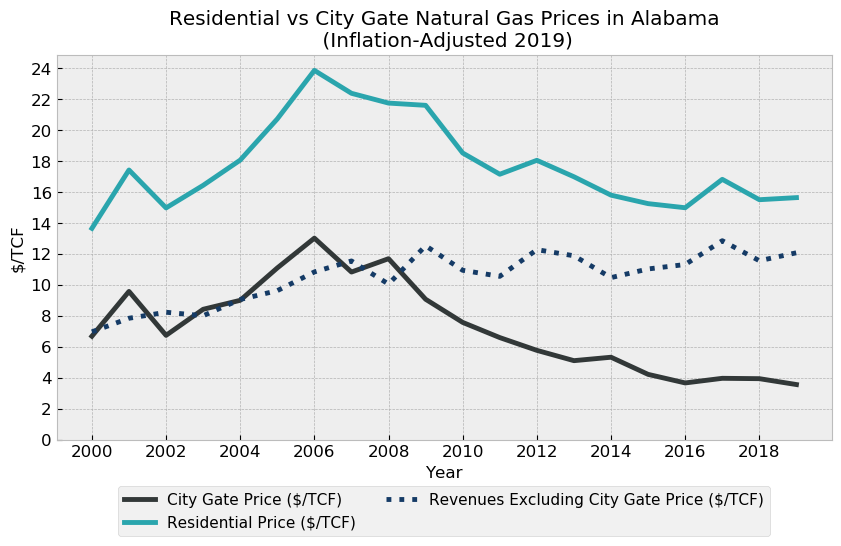

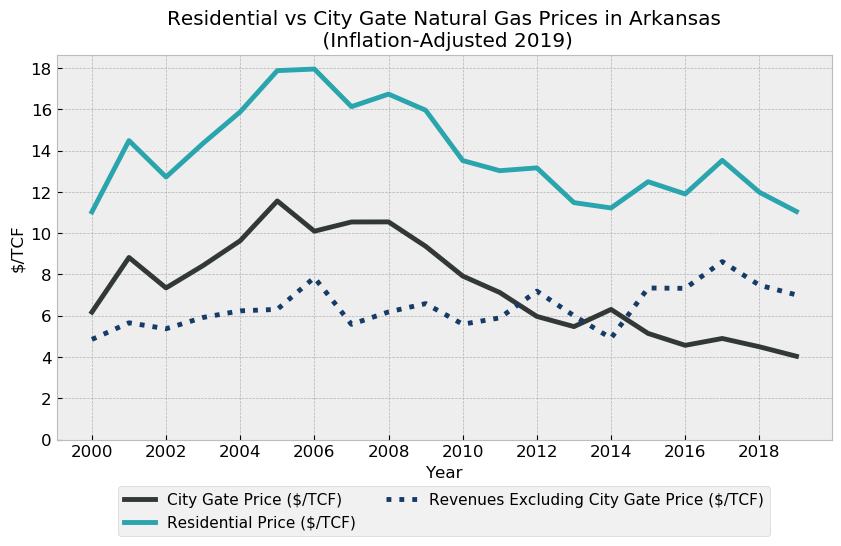

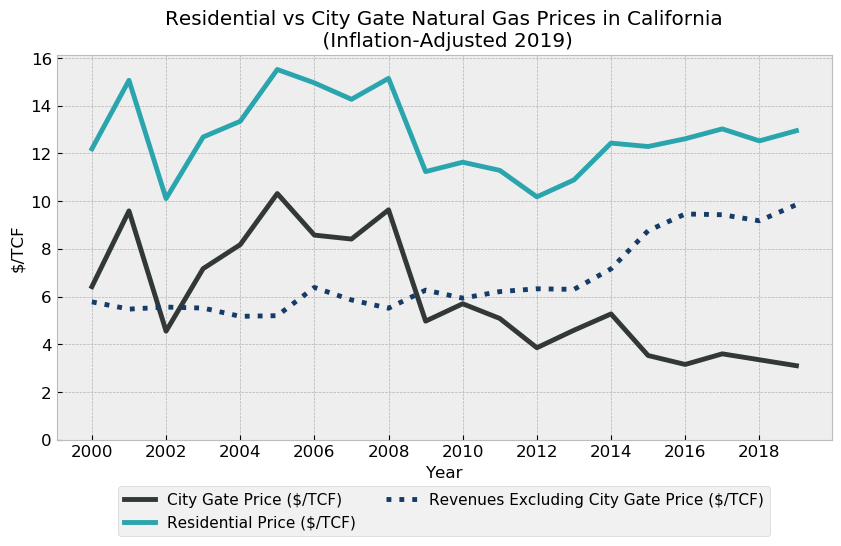

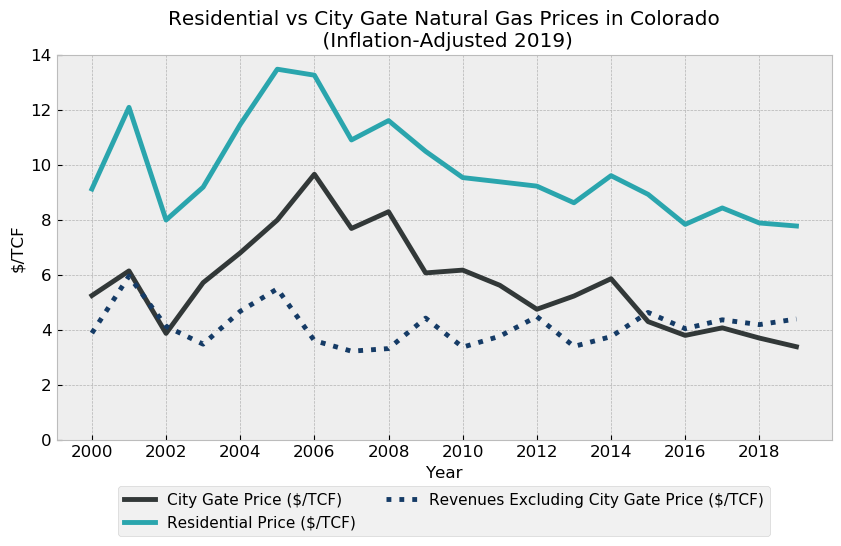

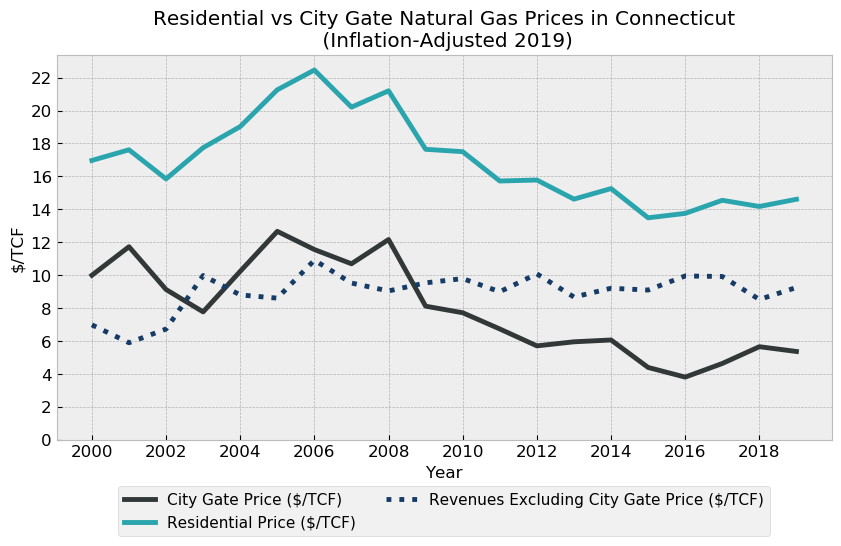

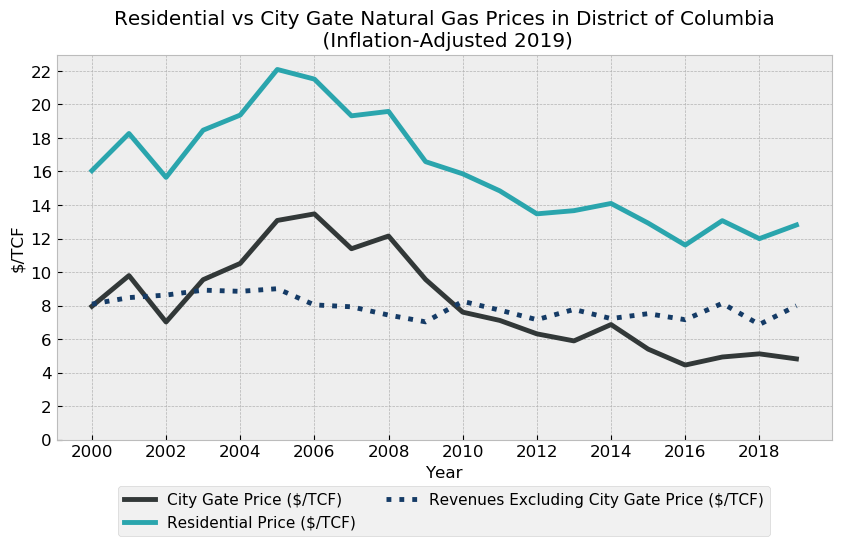

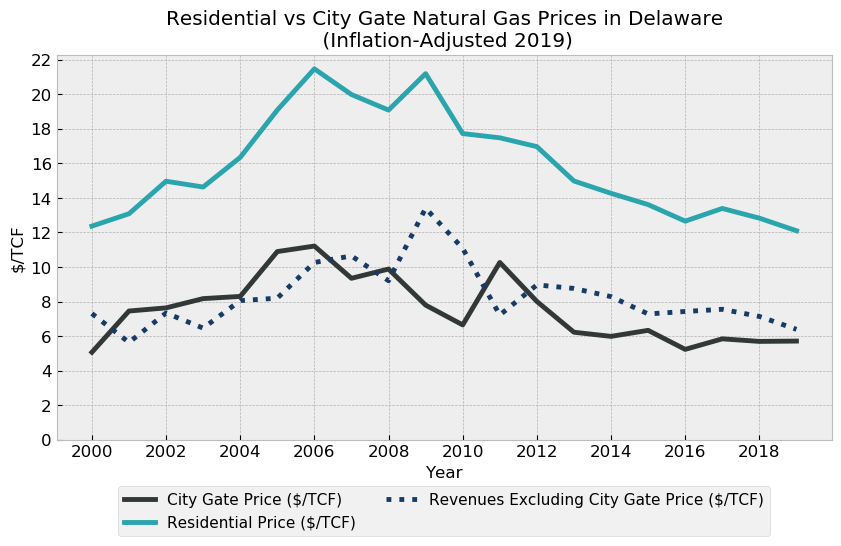

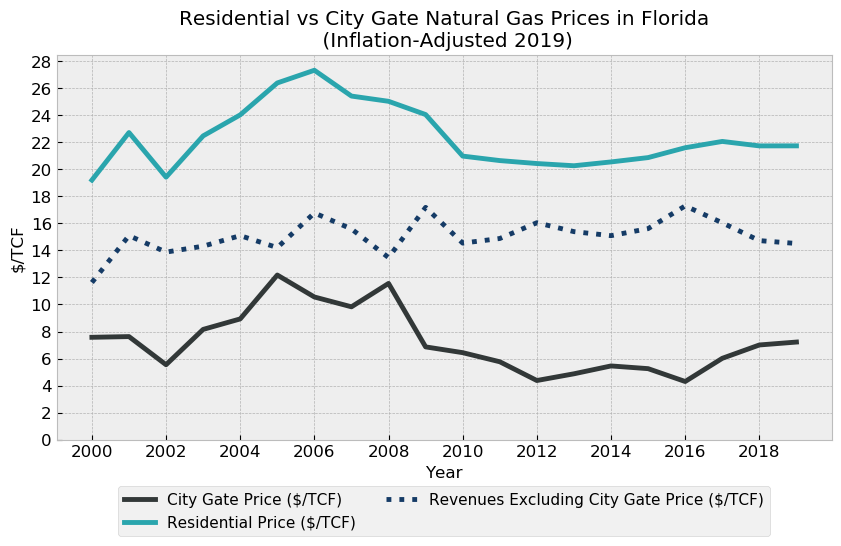

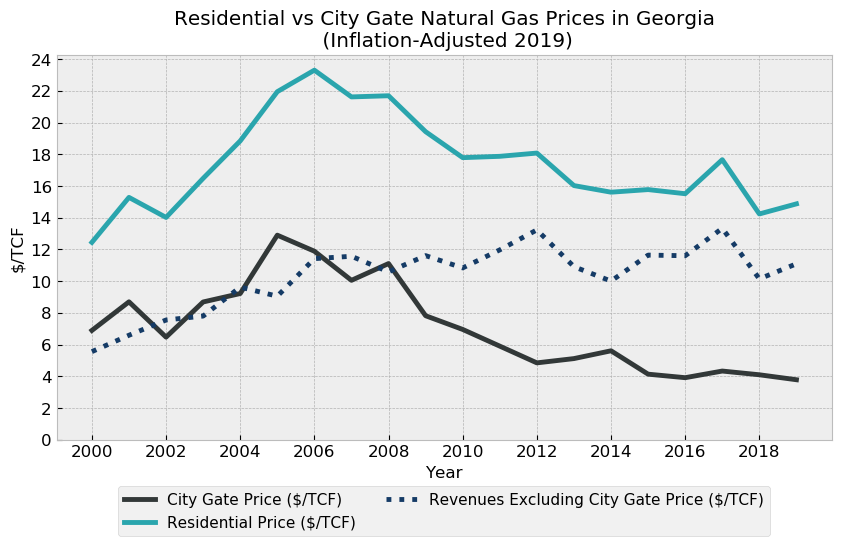

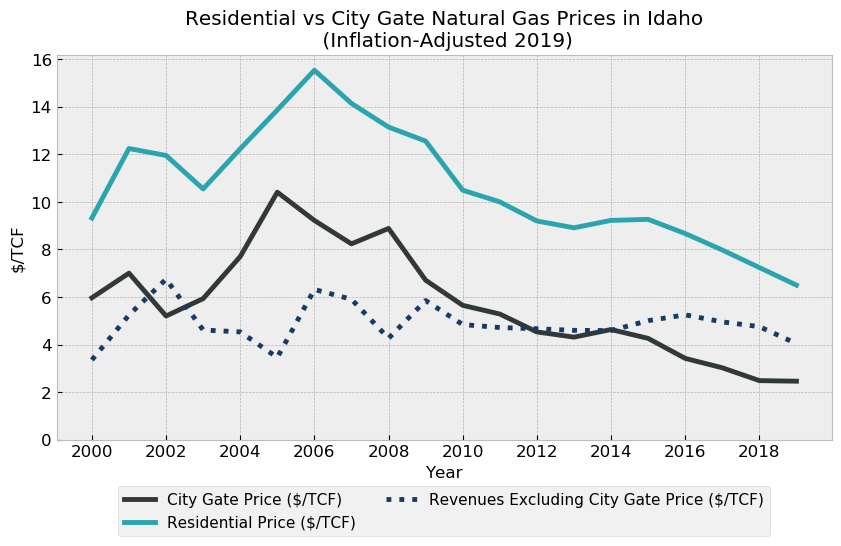

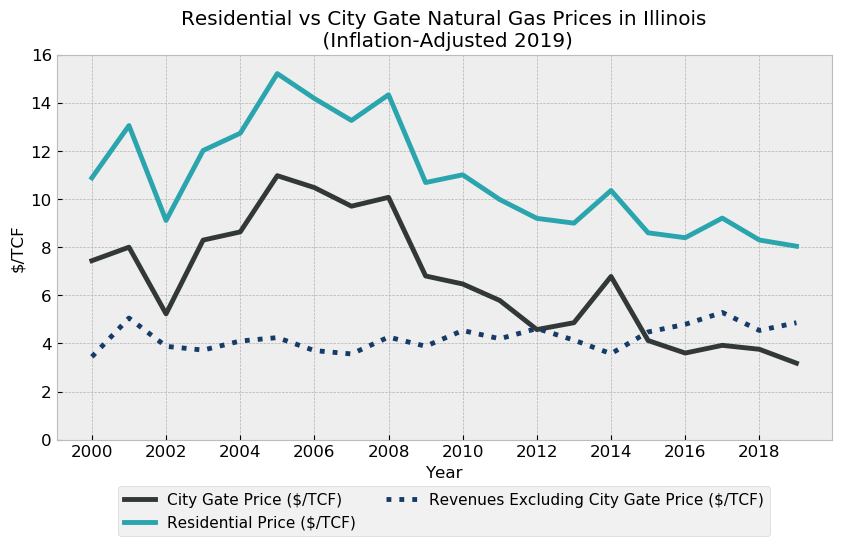

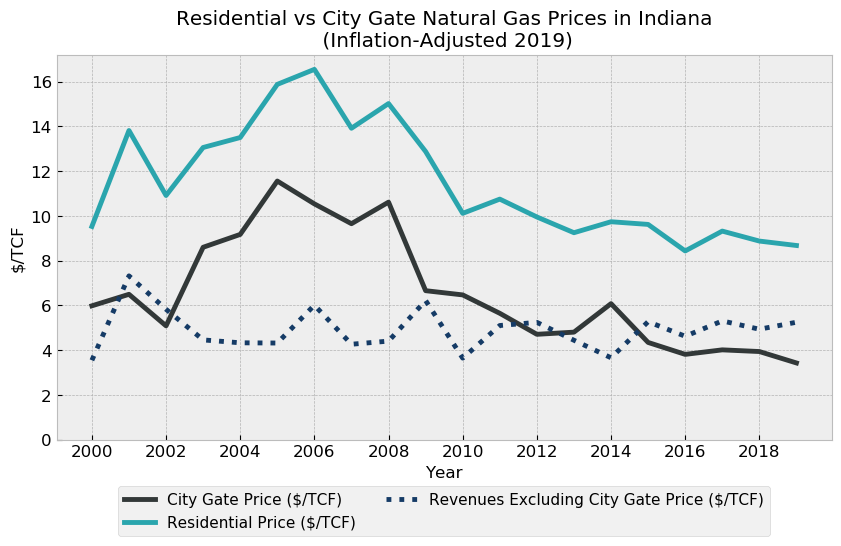

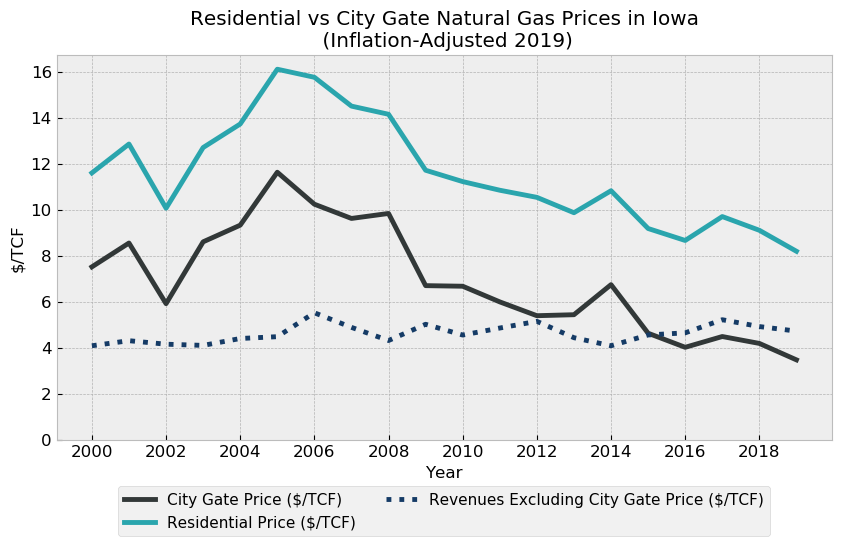

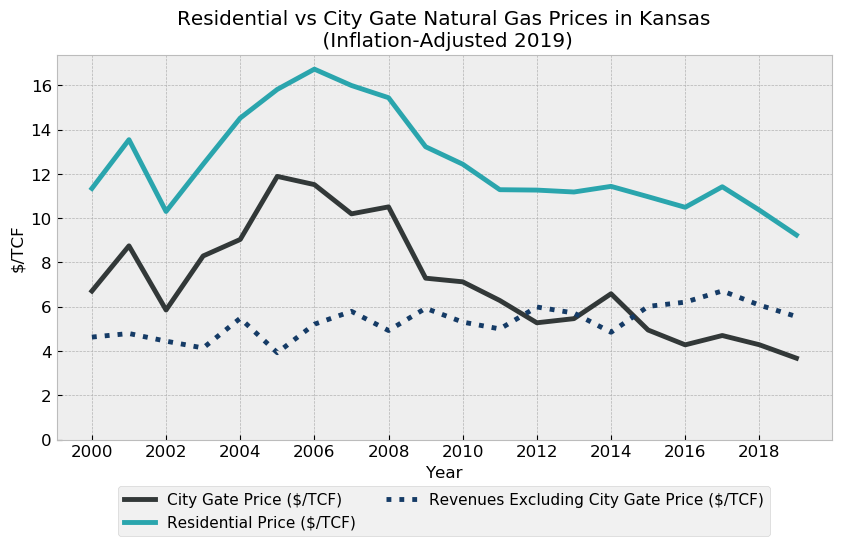

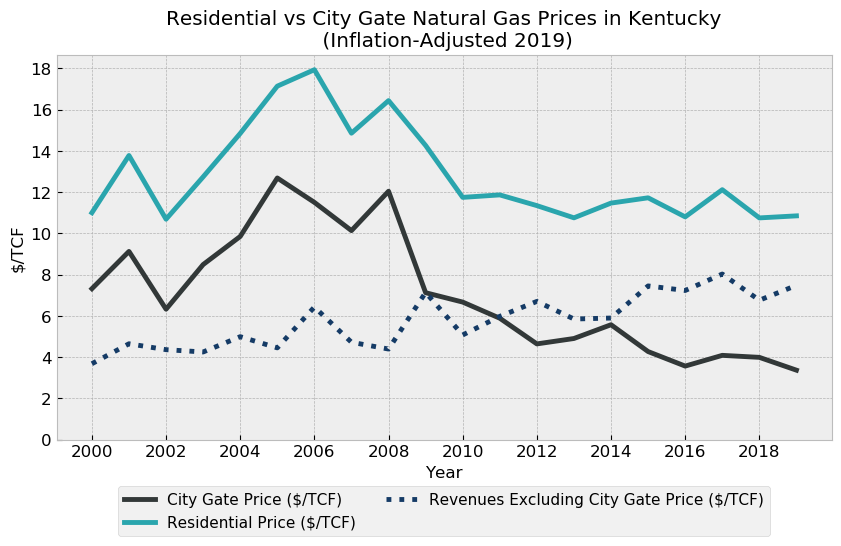

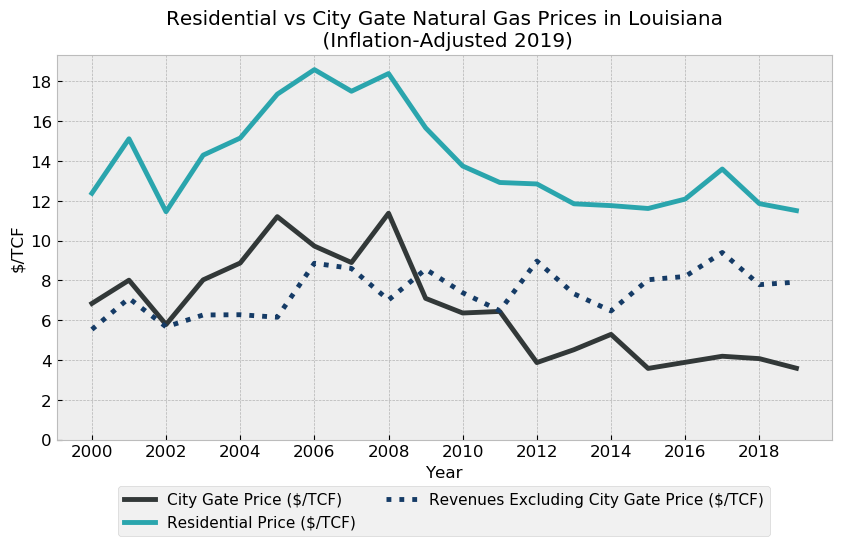

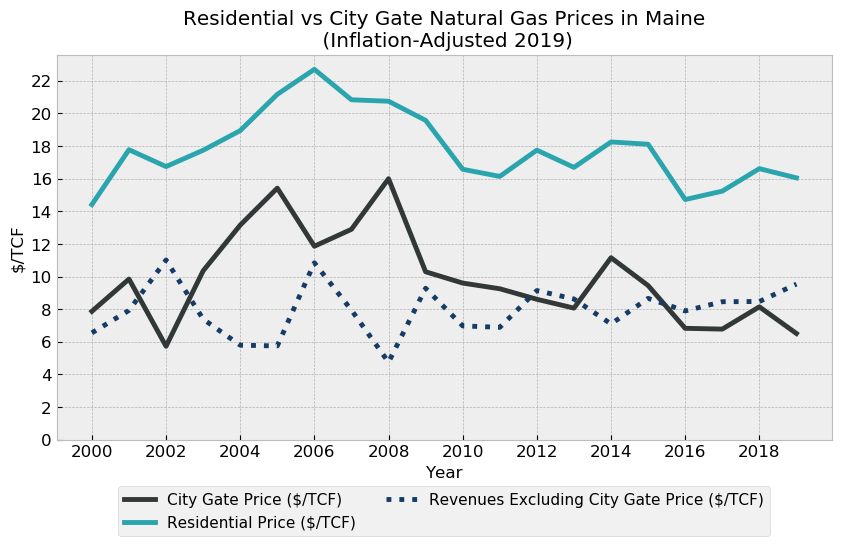

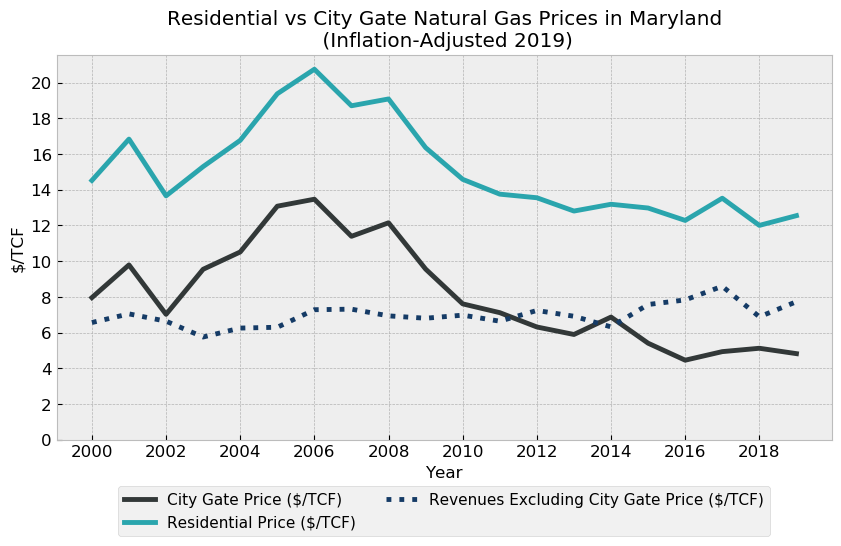

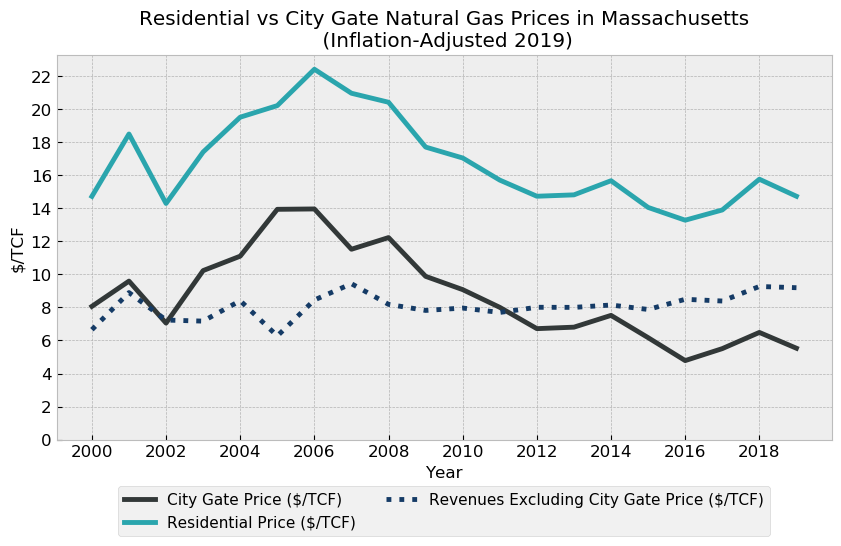

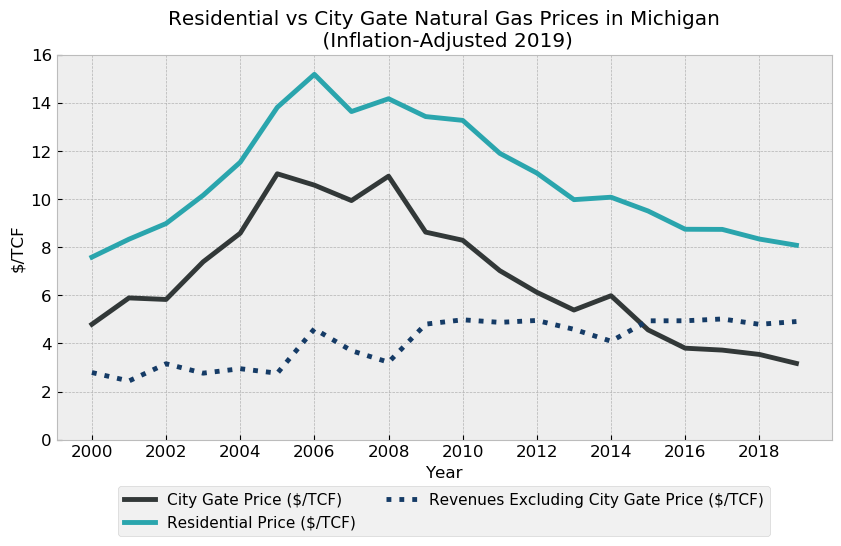

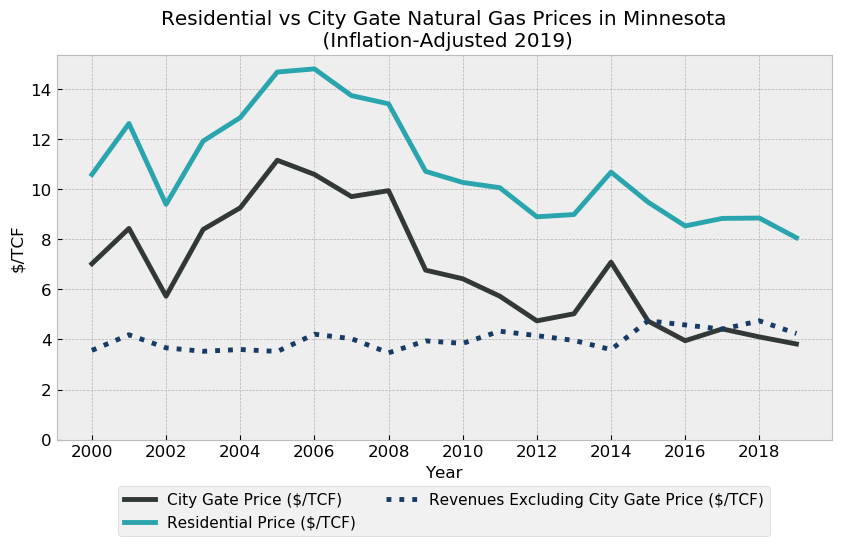

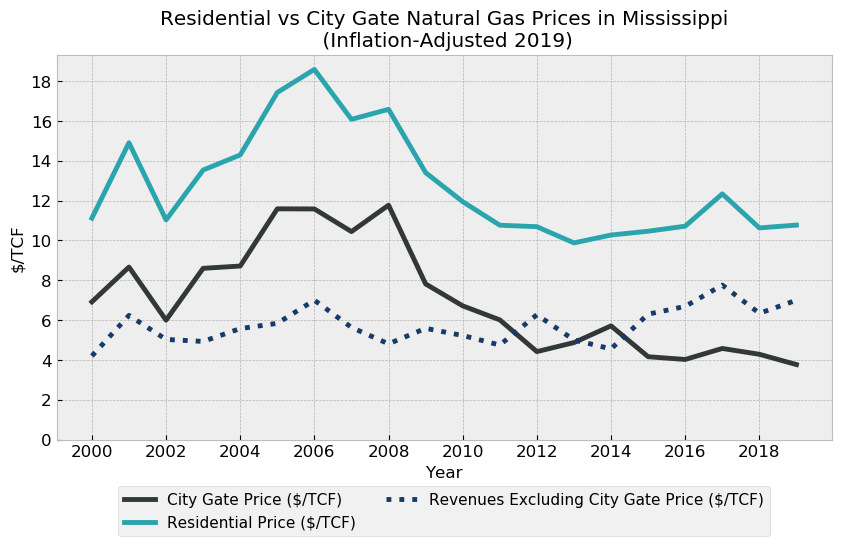

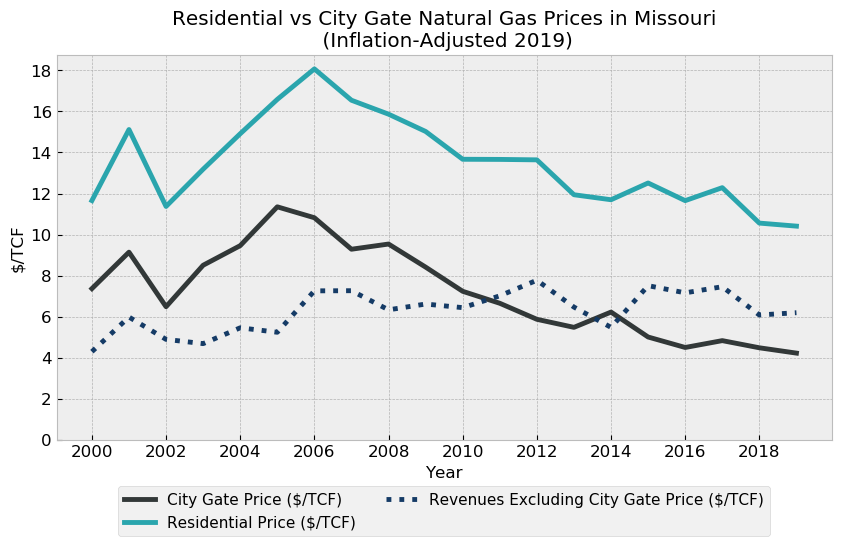

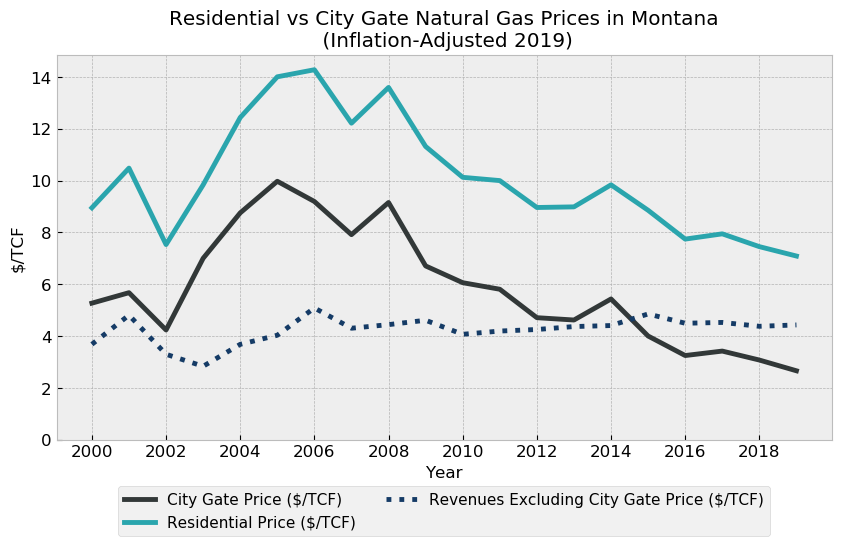

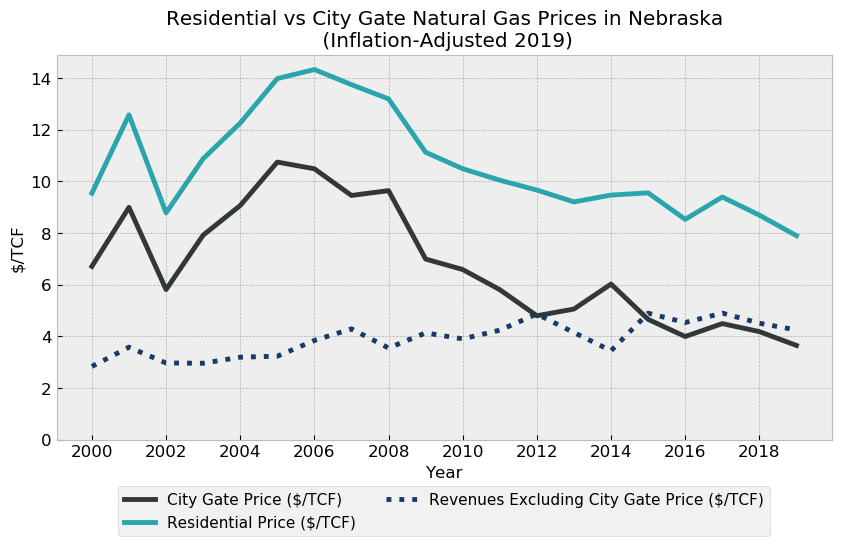

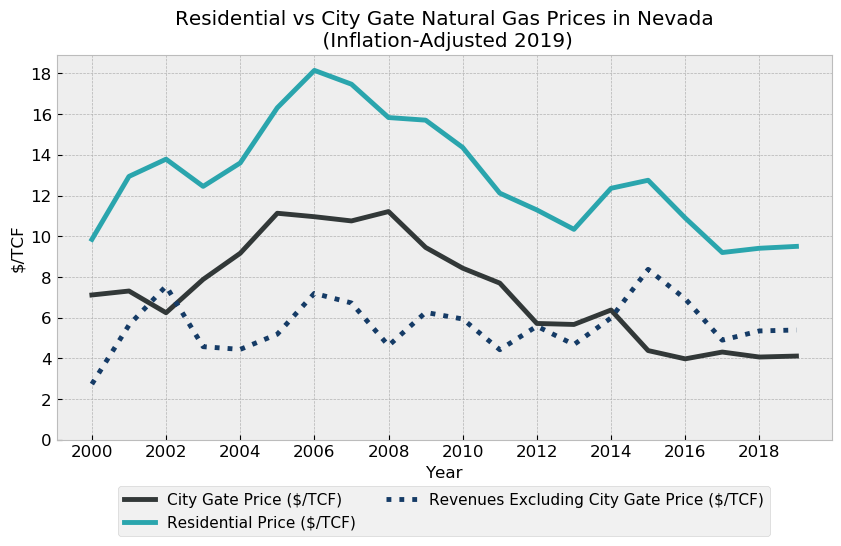

In [ ]:
for sa in states:
    df = pd.read_csv('../State Factbase/Spreadsheets/State-Level Data/'+abbrev_us_state[sa]+ '/Energy Economics/'+sa+' Electricity and Natural Gas Prices.csv',index_col=0)
    ngcg = list(df.iloc[5,:])
    resgas = list(df.iloc[6,:])
    price_diff = [resgas[i]-ngcg[i] for i in range(len(ngcg))]
    plt.figure(figsize=(10,5))
    start_year = int(df.columns[0])
    end_year = int(df.columns[-1])
    plt.plot(range(start_year, end_year+1), ngcg, label='City Gate Price ($/TCF)',linewidth='3.5',color='#323838')
    plt.plot(range(start_year, end_year+1), resgas, label='Residential Price ($/TCF)',linewidth='3.5', color='#2aa5ad')
    plt.plot(range(start_year, end_year+1), price_diff, ':', label='Revenues Excluding City Gate Price ($/TCF)',linewidth='3.5', color='#153b66')
    plt.title('Residential vs City Gate Natural Gas Prices in ' + abbrev_us_state[sa] + '\n (Inflation-Adjusted '+str(end_year)+')')
    plt.xticks(np.arange(start_year, end_year, step=2), fontsize=12)
    plt.legend(fontsize=11, ncol=2, bbox_to_anchor=(0.5, -0.27), loc='lower center')
    plt.xlabel('Year')
    plt.ylabel('$/TCF')
    plt.yticks(np.arange(0,int(val_max([ngcg,resgas]))+2, step=2), fontsize=12)
    plt.savefig('../State Factbase/Visualizations/States/'+abbrev_us_state[sa]+'/Natural Gas Prices/'+abbrev_us_state[sa]+' Residential vs City-Gate Natural Gas Prices.pdf',bbox_inches='tight')
    plt.show()
    plt.close()